In [2]:
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam

from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau


from glob import glob

Using TensorFlow backend.


In [2]:
daisy = glob('train\\daisy\\*.jpg')
dandelion = glob('train\\dandelion\\*.jpg')
rose = glob('train\\rose\\*.jpg')
sunflower = glob('train\\sunflower\\*.jpg')
tulip = glob('train\\tulip\\*.jpg')


test = glob('test\\*.jpg')

In [3]:
Daisy = np.array(daisy)
Dandelion = np.array(dandelion)
Rose = np.array(rose)
Sunflower = np.array(sunflower)
Tulip = np.array(tulip)
train_num = len(Daisy)+len(Dandelion)+len(Rose)+len(Sunflower)+len(Tulip)

Test= np.array(test)

In [4]:
print("daisy size :", len(Daisy))
print("dandelion :", len(Dandelion))
print("rose :", len(Rose))
print("sunflower :", len(Sunflower))
print("tulip :", len(Tulip))
print("test_files size :", len(Test))

daisy size : 500
dandelion : 687
rose : 515
sunflower : 488
tulip : 633
test_files size : 2000


In [5]:
data_generator = ImageDataGenerator(rotation_range=20,
                                   validation_split = 0.1, #切割訓練集為驗證集之比例
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='wrap')


In [6]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_acc", patience=10, verbose=1 )

In [7]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(factor=0.5, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=5, 
                              verbose=1)

# 模型程式碼

import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import MaxPooling2D, Input, Flatten
from keras.layers import Dense,Dropout,Flatten,Dot,Add,Concatenate,Input,BatchNormalization,Activation
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model

def CNNmodel(input_shape, num_classes=5, drop = 0.5):
    inputs = Input(shape=input_shape)
    cnn = Conv2D(32, (3,3), padding='valid', input_shape=input_shape)(inputs)
    cnn = BatchNormalization()(cnn)
    cnn = Activation('relu')(cnn)
    cnn = Conv2D(48, (3,3), padding='valid')(cnn)
    cnn = BatchNormalization()(cnn)
    cnn = Activation('relu')(cnn)
    cnn = MaxPooling2D(pool_size=2)(cnn)
    cnn = Dropout(drop)(cnn)
    cnn = Conv2D(64, (3,3), padding='valid')(cnn)
    cnn = BatchNormalization()(cnn)
    cnn = Activation('relu')(cnn)
    cnn = Conv2D(80, (3,3), padding='valid')(cnn)
    cnn = BatchNormalization()(cnn)
    cnn = Activation('relu')(cnn)
    cnn = MaxPooling2D(pool_size=2)(cnn)
    cnn = Dropout(drop)(cnn)
    cnn = Conv2D(96, (3,3), padding='valid')(cnn)
    cnn = BatchNormalization()(cnn)
    cnn = Activation('relu')(cnn)
    cnn = Conv2D(112, (3,3), padding='valid')(cnn)
    cnn = BatchNormalization()(cnn)
    cnn = Activation('relu')(cnn)
    cnn = MaxPooling2D(pool_size=2)(cnn)
    cnn = Dropout(drop)(cnn)
    cnn = Conv2D(128, (3,3), padding='valid')(cnn)
    cnn = BatchNormalization()(cnn)
    cnn = Activation('relu')(cnn)
    cnn = Conv2D(144, (3,3), padding='valid')(cnn)
    cnn = BatchNormalization()(cnn)
    cnn = Activation('relu')(cnn)
    cnn = MaxPooling2D(pool_size=2)(cnn)
    y = Flatten()(cnn)
    hidden = Dense(1024)(y)
    hidden = Activation('relu')(hidden)
    hidden = Dropout(drop)(hidden)
    hidden = Dense(512)(hidden)
    hidden = Activation('relu')(hidden)
    hidden = Dropout(drop)(hidden)
    hidden = Dense(128)(hidden)
    hidden = Activation('relu')(hidden)
    outputs = Dense(num_classes,
                    activation='softmax')(hidden)
    model = Model(inputs=inputs, outputs=outputs)
    return model

# 讀取建立好的CNN模型

In [8]:
from model import CNNmodel 
model = CNNmodel(input_shape=(128,128,3)) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 48)      13872     
_________________________________________________________________
batch_normalization_2 (Batch (None, 124, 124, 48)      192       
_________________________________________________________________
activation_2 (Activation)    (None, 124, 124, 48)      0         
__________

In [9]:
train_data_dir = 'train'
img_width, img_height = 128, 128
batch_size = 32
epochs = 100

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-3),
              metrics=['accuracy'])


#使用分批資料訓練模型


trainimages = data_generator.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    color_mode='rgb',
                                                    subset = 'training',
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    seed=42)
model.fit_generator(trainimages,
                    steps_per_epoch=int(train_num /batch_size),
                    epochs=epochs,
                    verbose=1,
                    validation_data=data_generator.flow_from_directory(train_data_dir,
                                                                       target_size=(img_width, img_height),
                                                                       batch_size=batch_size,
                                                                       color_mode='rgb',
                                                                       subset = 'validation',
                                                                       class_mode='categorical',
                                                                       shuffle=True,
                                                                       seed=42),
                    callbacks=[earlystop,reduce_lr])


model.save('my_model.h5')

Found 2543 images belonging to 5 classes.
Found 280 images belonging to 5 classes.
Epoch 1/100
88/88 [==============================] - 15s 170ms/step - loss: 1.3882 - acc: 0.4075 - val_loss: 2.0301 - val_acc: 0.4107
Epoch 2/100
88/88 [==============================] - 13s 143ms/step - loss: 1.1986 - acc: 0.5132 - val_loss: 7.2182 - val_acc: 0.2107
Epoch 3/100
88/88 [==============================] - 13s 147ms/step - loss: 1.1139 - acc: 0.5419 - val_loss: 2.3891 - val_acc: 0.4143
Epoch 4/100
88/88 [==============================] - 13s 148ms/step - loss: 1.0920 - acc: 0.5627 - val_loss: 1.1386 - val_acc: 0.5500
Epoch 5/100
88/88 [==============================] - 13s 148ms/step - loss: 1.0141 - acc: 0.5871 - val_loss: 1.8831 - val_acc: 0.4643
Epoch 6/100
88/88 [==============================] - 13s 147ms/step - loss: 0.9830 - acc: 0.5985 - val_loss: 1.0685 - val_acc: 0.5857
Epoch 7/100
88/88 [==============================] - 13s 146ms/step - loss: 0.9811 - acc: 0.6194 - val_loss: 0.98

# 將訓練好的模型拿來預測Test

In [13]:

model = keras.models.load_model('final_model.h5')
test_data_dir = 'test'
test_generator = ImageDataGenerator()
testimages = test_generator.flow_from_directory(test_data_dir,
                                                target_size=(img_width, img_height),
                                                color_mode="rgb",
                                                batch_size=1,
                                                class_mode=None,
                                                shuffle=False,
                                                seed=42)
testimages.reset()
pred=model.predict_generator(testimages,verbose=1)

Found 2000 images belonging to 1 classes.
2000/2000 [==============================] - 15s 8ms/step


# 產生要上傳的答案卷

In [ ]:
import os
import pandas as pd
results = np.argmax(pred , axis = 1)
testfiles = []
testpredict = []
i = 0
for filename in os.listdir(test_data_dir+'/test'):
    testfiles.append(filename.rsplit('.', 1)[0])
    testpredict.append(results[i])
    i += 1


    

submission = pd.DataFrame({
        "id" : testfiles,
        "flower_class" : testpredict
    })

submission.to_csv('final_exam.csv' , index = False)

# 最佳成績及排名

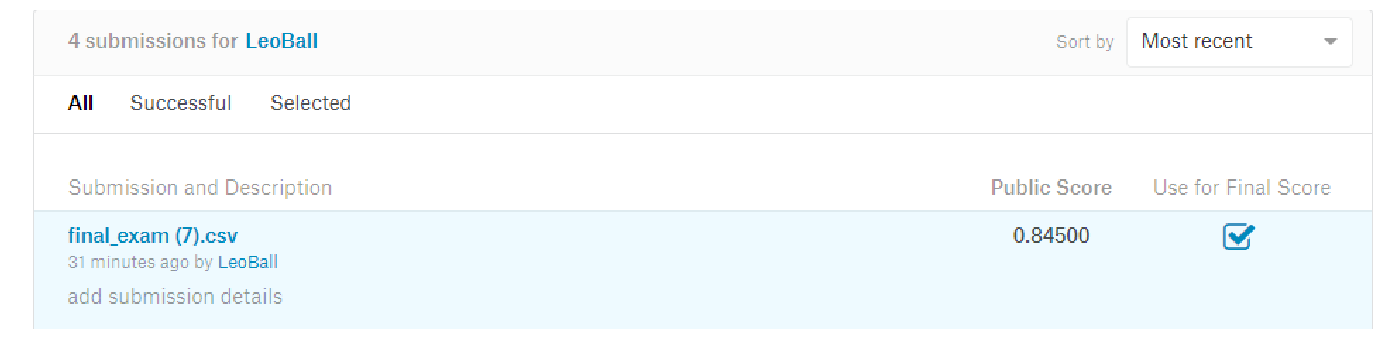

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(24,24)) 
gb = mpimg.imread('score.png')
plt.imshow(gb)
plt.axis('off') # 不顯示座標軸
plt.show()

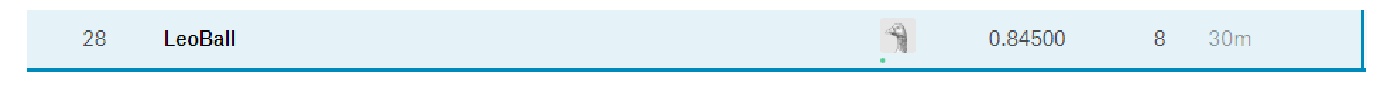

In [12]:
plt.figure(figsize=(24,24)) 
gb = mpimg.imread('rank.png')
plt.imshow(gb)
plt.axis('off') # 不顯示座標軸
plt.show()